<code style="background:none">Author: Iman Irajian</code> $\infty$

<table style="float:left">
    <thead>
        <tr>
            <th colspan=2></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Email:</td>
            <td><a style="text-decoration:none" href="mailto:iman.irajian@gmail.com?subject=Github machine-learning repository"><code style="color:darkblue; background:none;">iman.irajian@gmail.com</code></a></td>
        </tr>
        <tr>
            <td>LinkedIn:</td>
            <td><a style="text-decoration:none" href="https://www.linkedin.com/in/imanirajian/"><code style="color:darkblue; background:none;">linkedin.com/in/imanirajian</code></a></td>
        </tr>        
    </tbody>
</table>

> <div style="background-color:#EEEEEE">
$$  $$
$$ \textit{"If you can't explain it simply, you don't understand it well enough."} \space\space \textrm{ -- Albert Einstein} $$
>    
$$ \textit{"Setting goals is the first step in turning the invisible into the visible."} \space\space \textrm{ -- Tony Robbins} $$
$$  $$
</div>

#### Model: Multivariate Linear Regression
- Without regularization
- Compared with scikit-learn Multivariate Linear Regression

#### Dataset: 'scikit-learn' Boston House-Prices dataset

---
___

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from pandas import DataFrame

import sklearn as skt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load and hold the dataset, as well as the operations and properties related to it.
class Dataset:
    
    def __str__(self):
        return "Dataset: The 'scikit-learn' Boston House-Prices" 
    
    def __init__(self):
        print(self)        
        
    def load(self):
        boston = load_boston()
        self.data = boston
        self.df = DataFrame(np.concatenate((boston.data, boston.target.reshape(-1, 1)), axis=1), 
                            columns=np.concatenate((boston.feature_names, ["MEDV"])))
        
        self.plot_correlations()
        
        X = boston.data
        
        # Choose only a subset of features
        features_limit = ["LSTAT", "RM", "PTRATIO"]
        if len(features_limit)>0:
            features_index = np.where(dataset.data.feature_names==np.array(features_limit).reshape(-1,1))[1]
            X = X[:, features_index]
        
        X = self.preprocess(X)        
        
        y = boston.target.reshape(-1, 1) # Convert to Column vector        
        
        # Insert bias feature (x0 = 1) into features for all examples
        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
                
        self.X = X
        self.y = y
        
        print("Informations:")
        print("\t X ~", np.shape(X))
        print("\t y ~", np.shape(y))
        
        # Sanity check
        assert(len(X)==len(y))
        m = len(X)
        self.m = m
        print("\t m:", m)            
        
        # Number of features
        n = np.shape(X)[1]
        self.n = n
        print("\t n:", n)
        
        # train, dev, test sets split
        X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=.1, random_state=0)
        X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=.1, random_state=0)
                
        # Number of examples
        m_train = len(X_train)
        m_dev = len(X_dev)
        m_test = len(X_test)

        print("\t m_train:", m_train)
        print("\t m_dev:", m_dev)
        print("\t m_test:", m_test)
        
        assert(m_train+m_dev+m_test == m)
            
        return X_train, X_dev, X_test, y_train, y_dev, y_test, m_train, m_dev, m_test, m, n
    
    def plot_correlations(self):
        def config_figure(): # Configures the seaborn figures                   
            sns.set(
                #context='talk',
                style='darkgrid',
                #palette='deep',
                font='sans-serif',
                #font_scale=1,                
                color_codes=True,                
            )                                
        config_figure()
        
        plt.figure(figsize=(14, 10))
        correlation_matrix = self.df.corr()        
        
        ax = sns.heatmap(correlation_matrix, annot=True)                
        ax.set(xlabel="Features and target", ylabel="Features and target")
        plt.title(label="Features and target (=MEDV) correlations", 
                  fontweight="bold",
                  fontsize=15)
        
        # Issue in matplotlib 3.1.1: https://github.com/matplotlib/matplotlib/issues/14675
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        
        plt.show()                
         
        sns.jointplot("LSTAT", "MEDV", data=self.df, kind="reg")        
        sns.jointplot("RM", "MEDV", data=self.df, kind="reg")        
        sns.jointplot("PTRATIO", "MEDV", data=self.df, kind="reg")        
        plt.show()
    
    def preprocess(self, X):
        X_ = (X-np.mean(X, axis=0)) / np.std(X, axis=0) # Z normalization
        return X_
        
    # Properties
    # -------------------------------------------
    
    # Data
    @property
    def data(self):
        return self.__data
    @data.setter
    def data(self, value):
        self.__data = value
    
    # Features
    @property
    def X(self):
        return self.__X
    @X.setter
    def X(self, value):
        self.__X = value
    
    # Labels   
    @property
    def y(self):
        return self.__y
    @y.setter
    def y(self, value):
        self.__y = value
    
    # Number of examples
    @property
    def m(self):
        return self.__m
    @m.setter
    def m(self, value):
        self.__m = value
    
    # Number of features
    @property
    def n(self):
        return self.__n
    @n.setter
    def n(self, value):
        self.__n = value

Dataset: The 'scikit-learn' Boston House-Prices


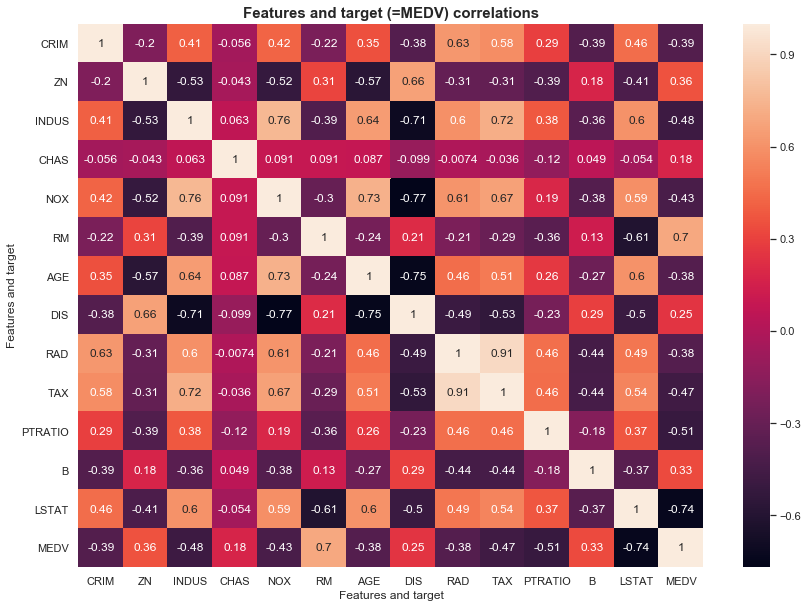

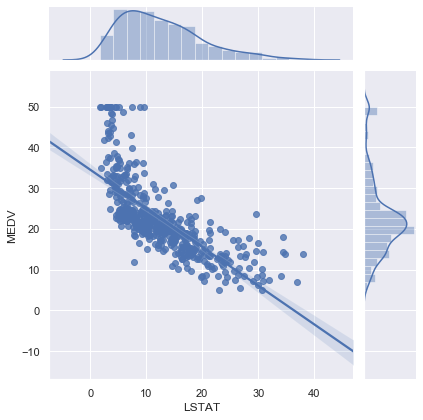

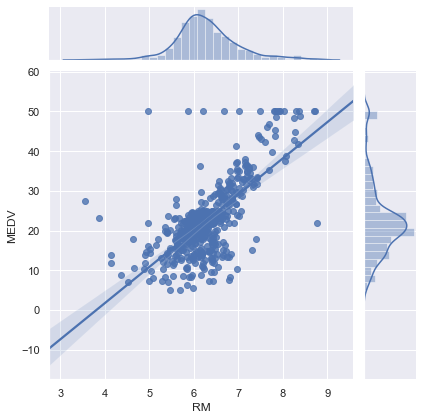

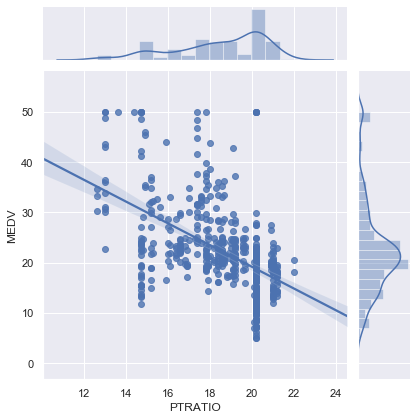

Informations:
	 X ~ (506, 4)
	 y ~ (506, 1)
	 m: 506
	 n: 4
	 m_train: 409
	 m_dev: 46
	 m_test: 51


In [3]:
dataset = Dataset()
X_train, X_dev, X_test, y_train, y_dev, y_test, m_train, m_dev, m_test, m, n = dataset.load()

---

# Multivariate Linear Regression Model
    (Without regularization)

model (hypothesis): $h_{\boldsymbol{\theta}}\left(\boldsymbol{x}^{\left(i\right)}\right) = \boldsymbol{\theta}_{1\times n}^{\mathrm{T}}\boldsymbol{x}^{\left(i\right)}_{n\times 1} \in \mathbb{R}$ $\Longrightarrow$ vectorized:  $h_{\boldsymbol{\theta}}\left({\boldsymbol{X}}\right)_{m\times 1} = \boldsymbol{X}_{m\times n}\boldsymbol{\theta}_{n\times 1}$

cost function: $\displaystyle J\left(\boldsymbol{\theta}\right) = \frac{1}{2m}\sum_{i=1}^{m} {\left\lbrace {h_{\boldsymbol{\theta}}\left({\boldsymbol{x}^{\left(i\right)}}\right)-y^{\left(i\right)}} \right\rbrace } ^ {2} \in \mathbb{R}$

In [4]:
class Model:
    
    def __str__(self):
        return "Multivariate Linear Regression"
    #--------------------------------------------------------
    # Model parameters and hyperparameters initialization
    def __init__(self):
        print(self)
        self.theta = np.zeros((n, 1)) # Model parameters
        print("theta ~", np.shape(self.theta) )
        self.alpha = 0.06 # Learning rate #0.15 #0.01 #0.001 #0.0001
        self.epochs = 80
        # Cost function values during the training
        self.costs_train = []
        self.costs_dev = []                
    #--------------------------------------------------------    
    # Fitting the model to the training set w.r.t. the development set
    def fit(self, X_train, X_dev, y_train, y_dev):
        for epoch in np.arange(1, self.epochs+1):
            
            # Predictions
            preds_train = self.predict(X_train)
            preds_dev = self.predict(X_dev)
            
            # Costs
            J_train = self.cost(preds_train, y_train)
            J_dev = self.cost(preds_dev, y_dev)            
            
            # Accumulating costs for plotting the learning curves
            self.costs_train.append(J_train)
            self.costs_dev.append(J_dev)
            
            # Derivatives
            dtheta = (1/m) * np.matmul(X_train.T , (preds_train - y_train))
            
            # Update parameters
            self.update(dtheta)                        
            
        # Plot the learning curve
        self.plot_learning_curve()
    #--------------------------------------------------------
    # Update the parameters of the model
    def update(self, dtheta):
        self.theta -= self.alpha * dtheta
    #--------------------------------------------------------
    # Model prediction for some examples
    def predict(self, X):
        # Hypothesis
        preds = np.matmul(X, self.theta)
        return preds
    #--------------------------------------------------------
    # Evaluation of model on the test set
    def evaluate(self, X_test, y_test):
        m_test = X_test.shape[0]
        print("test set>")
        preds_test = self.predict(X_test)
        J_test = self.cost(preds_test, y_test)        
        
        se_test = np.sum( np.power( (preds_test-y_test), 2 ) )
        mse_test = (1/m_test)*(se_test)
        rmse_test = np.sqrt( mse_test )
        r2_score = 1-( se_test / np.sum( np.power(y_test-np.mean(y_test),2) ) )
        
        #print("\t", "Cost: ", J_test)
        print("\t", "MSE: ", mse_test)
        print("\t", "RMSE: ", rmse_test)
        print("\t", "r2 score: ", r2_score)
    #--------------------------------------------------------    
    # Use for getting the parameters of the model especially after the training
    def get_parameters(self):
        return self.theta
    #--------------------------------------------------------
    # Plot the learning curve to decision making purposes
    def plot_learning_curve(self):
        def config_figure():
            plt.xlabel("Epoch")
            plt.ylabel("Cost")        
            plt.title("Learning curve [train set]")           
            plt.legend()
        
        data = [[self.costs_train], [self.costs_dev], [self.costs_train, self.costs_dev]]
        labels = [["Trainig cost"], ["Development (validation) cost"], ["Trainig cost", "Development (validation) cost"]]
        styles = [["r-"], ["b-"], ["r-", "b-"]]
        
        for i, [dt, label, style] in enumerate(zip(data, labels, styles), 0):
            plt.figure()    
            for j, d in enumerate(dt, 0):
                plt.plot(np.arange(self.epochs), d, style[j], label=label[j])      
            config_figure()
            plt.show() 
    #--------------------------------------------------------    
    def cost(self, preds, y):
        J = (1/2) * np.mean( np.power( np.sum(preds-y), 2 ) )
        return J        

In [5]:
model = Model()

Multivariate Linear Regression
theta ~ (4, 1)


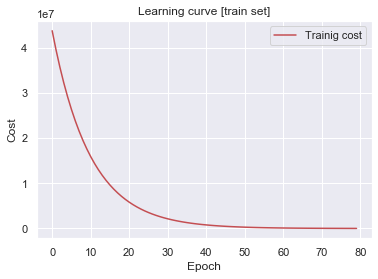

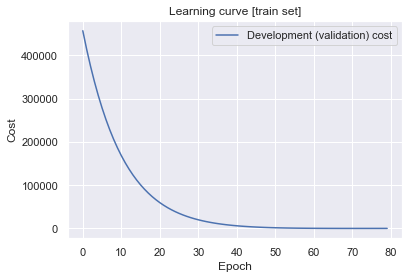

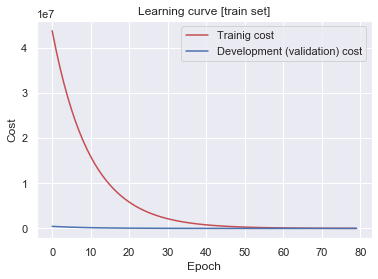

In [6]:
model.fit(X_train, X_dev, y_train, y_dev)

---

# Scikit-learn Multivariate Linear Regression

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
clf = LinearRegression()

In [9]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
preds_test = clf.predict(X_test)

---

# Compare results

- Mertics

In [11]:
print("scikit-learn")
print("test set>")
print("\t", "MSE: ", mean_squared_error(y_test, preds_test))
print("\t", "RMSE: ", np.sqrt(mean_squared_error(y_test, preds_test)))
print("\t", "r2 score: ", r2_score(y_test, preds_test))

scikit-learn
test set>
	 MSE:  52.699113481461566
	 RMSE:  7.2594155054977785
	 r2 score:  0.3873909985695484


In [12]:
model.evaluate(X_test, y_test)

test set>
	 MSE:  52.57408257231115
	 RMSE:  7.250798754089866
	 r2 score:  0.38884443972524296


- Parameters

In [13]:
print("scikit-learn")
clf.coef_.reshape(-1, 1)

scikit-learn


array([[ 0.        ],
       [-3.93692071],
       [ 3.30415376],
       [-2.39305044]])

In [14]:
model.get_parameters()

array([[22.20430788],
       [-3.8843563 ],
       [ 3.43707597],
       [-2.32468044]])

&#8718;

---

#### References:
**1-** **Machine learning** [Coursera] by *Andrew Ng*:  https://www.coursera.org/learn/machine-learning

**2-** **Pattern Recognition and Machine Learning** by *Christopher Bishop*: https://www.springer.com/gp/book/9780387310732

---

<code style="background:none">Author: Iman Irajian</code> $\infty$

<table style="float:left">
    <thead>
        <tr>
            <th colspan=2></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Email:</td>
            <td><a style="text-decoration:none" href="mailto:iman.irajian@gmail.com?subject=Github machine-learning repository"><code style="color:darkblue; background:none;">iman.irajian@gmail.com</code></a></td>
        </tr>
        <tr>
            <td>LinkedIn:</td>
            <td><a style="text-decoration:none" href="https://www.linkedin.com/in/imanirajian/"><code style="color:darkblue; background:none;">linkedin.com/in/imanirajian</code></a></td>
        </tr>        
    </tbody>
</table>